# Load a Neon recording
In this tutorial, we will show how to load a single Neon recording downloaded from [Pupil Cloud](https://docs.pupil-labs.com/neon/pupil-cloud/).

To download sample code, execute __pyneon/sample_data.py__ or call ``get_sample_data(NAME)``

In [52]:
from pyneon import get_sample_data

# all paths are relative to the location of the notebook
dataset_path = get_sample_data('OfficeWalk')

C:\Users\jan-gabriel.hartel\Documents\GitHub\PyNeon\data


``get_sample_data`` yields the relative path of the dataset. We can define the path to one particular recording manually. Alternatively, we can also define a path directly

In [53]:
recording_path = dataset_path / 'Timeseries Data' /'walk1-e116e606'

# recording_path = r'..\..\data\OfficeWalk\Timeseries Data\walk1-e116e606'

Next, we can load one recording from the dataset. Printing it provides us with extensive information about the recording including metadata and a summary of underlying objects

In [54]:
from pyneon import NeonRecording

recording = NeonRecording(recording_path)

print(recording)


Recording ID: e116e606-5f3f-4d34-8727-040b8762cef8
Wearer ID: bcff2832-cfcb-4f89-abef-7bbfe91ec561
Wearer name: Qian
Recording start time: 2024-08-30 17:37:01.527000
Recording duration: 98.213 s
                  exist              filename                                                                                                                     path
3d_eye_states      True     3d_eye_states.csv     C:\Users\jan-gabriel.hartel\Documents\GitHub\PyNeon\data\OfficeWalk\Timeseries Data\walk1-e116e606\3d_eye_states.csv
blinks             True            blinks.csv            C:\Users\jan-gabriel.hartel\Documents\GitHub\PyNeon\data\OfficeWalk\Timeseries Data\walk1-e116e606\blinks.csv
events             True            events.csv            C:\Users\jan-gabriel.hartel\Documents\GitHub\PyNeon\data\OfficeWalk\Timeseries Data\walk1-e116e606\events.csv
fixations          True         fixations.csv         C:\Users\jan-gabriel.hartel\Documents\GitHub\PyNeon\data\OfficeWalk\Timeseries Dat

Each recording file has an associated object. Calling its .data attribute yields a pandas dataframe with all the included data

In [55]:
print(recording.gaze)
print(recording.gaze.data)

            timestamp [ns]  gaze x [px]  ...  elevation [deg]   time [s]
0      1725032224852161732     1067.486  ...        -0.748998   0.000000
1      1725032224857165732     1066.920  ...        -0.511733   0.005004
2      1725032224862161732     1072.699  ...        -0.426618   0.010000
3      1725032224867161732     1067.447  ...        -0.508251   0.015000
4      1725032224872161732     1071.564  ...        -0.260388   0.020000
...                    ...          ...  ...              ...        ...
18764  1725032319717194732      800.364  ...       -11.091931  94.865033
18765  1725032319722198732      799.722  ...       -10.470156  94.870037
18766  1725032319727194732      799.901  ...       -10.832782  94.875033
18767  1725032319732194732      796.982  ...       -10.903787  94.880033
18768  1725032319737194732      797.285  ...       -10.923870  94.885033

[18769 rows x 9 columns]


Let us see what else we can do with the data. One consideration is that realistic devices might drop data points due to a variety of reasons. We can compare the nominal and effective sampling rates for two continuous data streams: .gaze and .imu

In [56]:
print(f'Gaze: nominal sampling rate = {recording.gaze.sampling_freq_nominal}, effective sampling rate = {recording.gaze.sampling_freq_effective}')
print(f'IMU: nominal sampling rate = {recording.imu.sampling_freq_nominal}, effective sampling rate = {recording.imu.sampling_freq_effective}')

Gaze: nominal sampling rate = 200, effective sampling rate = 197.8078038925275
IMU: nominal sampling rate = 110, effective sampling rate = 115.35532450871617


We can see that the effective sampling rate in the Gaze recording is lower than the nominal. For imu, the effective rate is actually higher.
We can further explore this behaviour by plotting the distances between subsequent datapoints as a histogram. Dataframes can be operated upon with regular pandas logic

Text(0.010090909090909091, 100, 'IMU nominal sampling rate')

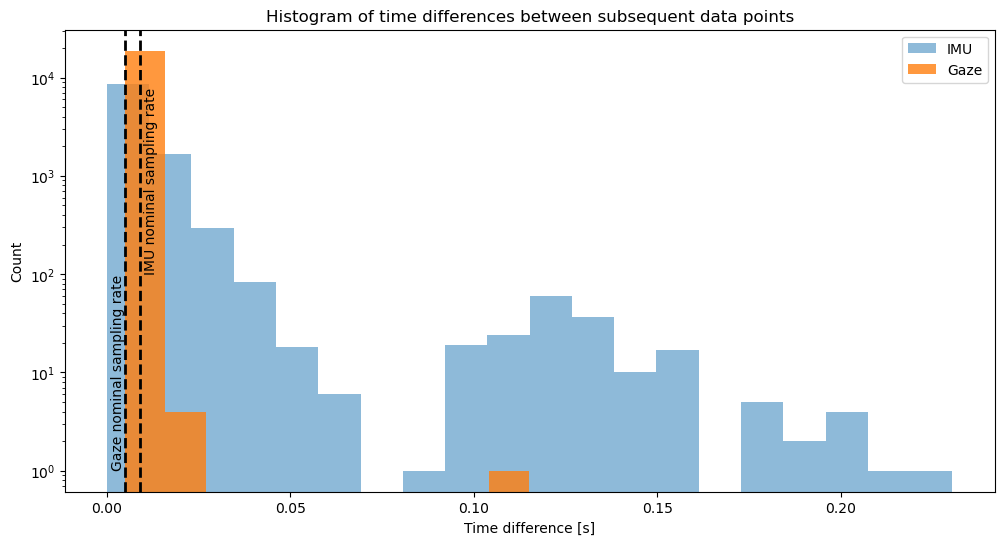

In [57]:
import numpy as np

import matplotlib.pyplot as plt

# Get the data points
gaze_times = recording.gaze.data['time [s]'].values
imu_times = recording.imu.data['time [s]'].values

# Calculate the distances between subsequent data points
gaze_diffs = np.diff(gaze_times)
imu_diffs = np.diff(imu_times)

# Plot the differences as a histogram
plt.figure(figsize=(12, 6))
plt.hist(imu_diffs, bins=20, alpha=0.5, label='IMU')
plt.hist(gaze_diffs, bins=10, alpha=0.8, label='Gaze')
# create a logaritmic scale on the y-axis
plt.yscale('log')
plt.legend()
plt.title('Histogram of time differences between subsequent data points')
plt.xlabel('Time difference [s]')
plt.ylabel('Count')

# draw a vertical line at the nominal sampling rate, add text
plt.axvline(1/recording.gaze.sampling_freq_nominal, color='k', linestyle='dashed', linewidth=2)
plt.text(1/recording.gaze.sampling_freq_nominal, 1, 'Gaze nominal sampling rate', rotation=90, verticalalignment='bottom', horizontalalignment='right')
plt.axvline(1/recording.imu.sampling_freq_nominal, color='k', linestyle='dashed', linewidth=2)
plt.text(1/recording.imu.sampling_freq_nominal+0.001, 100, 'IMU nominal sampling rate', rotation=90, verticalalignment='bottom', horizontalalignment='left')

We can clearly see that the Gaze data only has a low number of erroneous higher time differences. In contrast, the time differences for imu data are distributed all over the place, so __be cautious when using it__. See also the resample_and_concat tutorial where this problem is addressed

Of course, we can already do preliminary analysis of data on this single recording basis. For example, we might be interested in the distribution of fixations in time and space. For this, we will read fixation data and subsequently create both a histogram for durations as well as a scatterplot for the x- and y-coordinates

In [60]:
print(recording.fixations.data)

#durations = recording.fixations.data['duration [s]'].values
#xs = recording.fixations.data['start [s]'].values

AttributeError: 'NeonRecording' object has no attribute 'fixations'